In [4]:
# 1- Rekommendationssystem (25p)
# Använd valfritt data set, // youtube
#  utforska och analysera ert data set (EDA) 
# och bygg ett rekommendationssystem baserat på innehållsbaserad filtrering 
# (Content-based filtering), högre komplexitet ger högre poäng.

# Utöka eller gör ett till rekommendationssystemet med kollaborativ filtrering (Collaborative filtering), högre komplexitet ger högre poäng.
# Gör en slutsats, vilket presterade bättre och reflektera över varför.

# 2- Hybrid rekommendationssystem (15p)
# Utöka erat rekommendationssystem ytterligare genom att förklara och bygga ett hybrid rekommendations system (hybrid recommendation system), högre komplexitet ger högre poäng.

# Jämför resultaten och dra slutsatser med erat tidigare rekommendationssystem.

# 3- Teoretiskt rekommendationssystem (10p)
# Läs om Spotifys RecSys tävling 2018 och välj ett av resultaten från tävlingen att sätta er in i, se sidan på Itslearning. Förklara vad och hur de gjort både teoretiskt och praktiskt (kod) genom att gå igenom koden och förklara. Reflektera även till erat system om det finns några likheter och något ni har/kan utveckla.

# 4- Presentation (10p)
# Presentera era delar av projektet som ni gjort. Rikta in er på ca 20 minuter presentation, gäller live som videopresentation. Det är fritt fram att redigera videopresentationen och att vara kreativ, men talaren måste finnas i bild för att undvika plagiat.

# Observera att följdfrågor kan komma på plats eller via Itslearning.

# 1- Rekommendationssystem (25p)

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd

utforska och analysera ert data set (EDA) 

In [6]:
moviesdf = pd.read_csv('./movies.csv',index_col=None)
ratingsdf = pd.read_csv('./ratings.csv',index_col=None)

In [7]:
moviesdf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratingsdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# merge to dataset to gethers
df = ratingsdf.merge(moviesdf, on='movieId', how='left')
df.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi
100835,610,170875,3.0,1493846415,The Fate of the Furious (2017),Action|Crime|Drama|Thriller


In [10]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [11]:
df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
dtype: int64

In [12]:
dft = df.transpose()
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,100826,100827,100828,100829,100830,100831,100832,100833,100834,100835
userId,1,1,1,1,1,1,1,1,1,1,...,610,610,610,610,610,610,610,610,610,610
movieId,1,3,6,47,50,70,101,110,151,157,...,162350,163937,163981,164179,166528,166534,168248,168250,168252,170875
rating,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,3.5,3.5,3.5,5.0,4.0,4.0,5.0,5.0,5.0,3.0
timestamp,964982703,964981247,964982224,964983815,964982931,964982400,964980868,964982176,964984041,964984100,...,1493849971,1493848789,1493850155,1493845631,1493879365,1493848402,1493850091,1494273047,1493846352,1493846415
title,Toy Story (1995),Grumpier Old Men (1995),Heat (1995),Seven (a.k.a. Se7en) (1995),"Usual Suspects, The (1995)",From Dusk Till Dawn (1996),Bottle Rocket (1996),Braveheart (1995),Rob Roy (1995),Canadian Bacon (1995),...,The Magnificent Seven (2016),Blair Witch (2016),31 (2016),Arrival (2016),Rogue One: A Star Wars Story (2016),Split (2017),John Wick: Chapter Two (2017),Get Out (2017),Logan (2017),The Fate of the Furious (2017)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 7.4+ MB


In [14]:
unique_count = df['movieId'].nunique()
print("Number of unique movies:", unique_count)
unique_count = df['userId'].nunique()
print("Number of unique records:", unique_count)

Number of unique movies: 9724
Number of unique records: 610


In [15]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


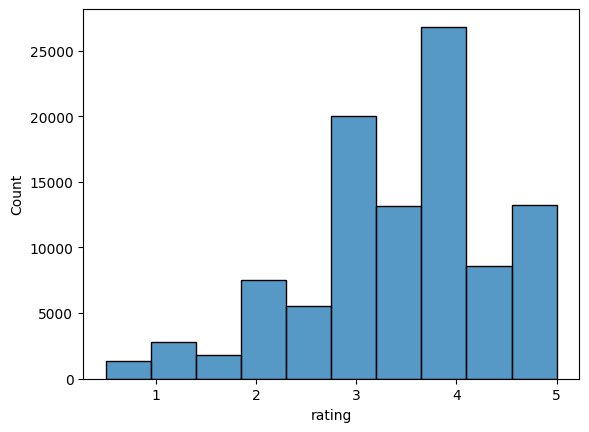

In [16]:
sns.histplot(data=df,x='rating',bins=10)
plt.show()

In [17]:
df['rating'].value_counts()
df['rating'] = np.ceil(df['rating'])
df['rating'].value_counts()

4.0    39954
3.0    25597
5.0    21762
2.0     9342
1.0     4181
Name: rating, dtype: int64

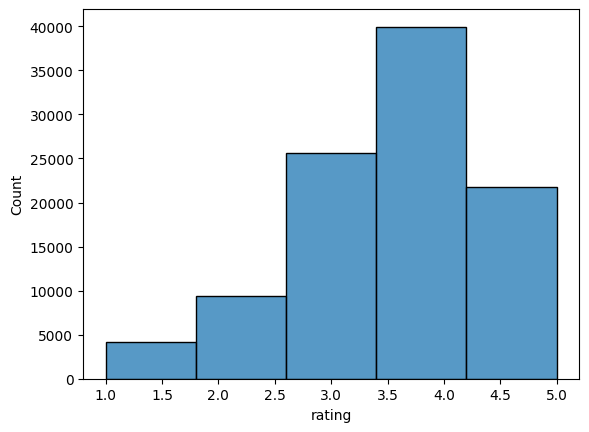

In [18]:
sns.histplot(data=df,x='rating',bins=5)
plt.show()

rekommendationssystem baserat på innehållsbaserad filtrering Content-based filtering

In [19]:
from tqdm import tqdm
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset

    def recommend(self, songs, amount=1):
        distance = []
        rec = self.dataset[self.dataset.title.str.lower() != songs.lower()]  # Filter out the input song
        
        # Check if there are songs left after filtering
        if rec.empty:
            print("No matching songs found in the dataset.")
            return None  # or handle the empty case accordingly
        
        song = rec.head(1).values[0]
# your videos columns id bystring
        for song_row in tqdm(rec.values):
            d = 0
            for col_idx, col_value in enumerate(song):
                if col_idx not in [1, 6, 12, 14, 18] and pd.api.types.is_numeric_dtype(rec.iloc[:, col_idx]):
                    d = d + np.absolute(float(col_value) - float(song_row[col_idx]))
# if else your videos columns id by numbers
            # for col in np.arange(len(rec.columns)):
            #     if col not in [1, 6, 12, 14, 18]:
            #         d = d + np.absolute(float(song[col]) - float(song_row[col]))
            distance.append(d)
        
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['movieId', 'title','rating','genres']
        return rec[columns][:amount]

# Assuming df2 is your DataFrame
recommendations = Spotify_Recommendation(df)
recommendations.recommend("Toy Story", 10)



100%|██████████| 100836/100836 [00:24<00:00, 4189.61it/s]


,movieId,title,rating,genres
0,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy
181,2761,"Iron Giant, The (1999)",5.0,Adventure|Animation|Children|Drama|Sci-Fi
186,2899,Gulliver's Travels (1939),5.0,Adventure|Animation|Children
88,1282,Fantasia (1940),5.0,Animation|Children|Fantasy|Musical
50,1023,Winnie the Pooh and the Blustery Day (1968),5.0,Animation|Children|Musical
30,552,"Three Musketeers, The (1993)",4.0,Action|Adventure|Comedy|Romance
130,2094,"Rocketeer, The (1991)",5.0,Action|Adventure|Sci-Fi
55,1031,Bedknobs and Broomsticks (1971),5.0,Adventure|Children|Musical
41,736,Twister (1996),3.0,Action|Adventure|Romance|Thriller
92,1377,Batman Returns (1992),3.0,Action|Crime


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

In [22]:
songs = df
songs.isnull().sum()
songsp = songs.transpose()
songsp.head()

,0,1,2,3,4,5,6,7,8,9,...,100826,100827,100828,100829,100830,100831,100832,100833,100834,100835
userId,1,1,1,1,1,1,1,1,1,1,...,610,610,610,610,610,610,610,610,610,610
movieId,1,3,6,47,50,70,101,110,151,157,...,162350,163937,163981,164179,166528,166534,168248,168250,168252,170875
rating,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,4.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0
timestamp,964982703,964981247,964982224,964983815,964982931,964982400,964980868,964982176,964984041,964984100,...,1493849971,1493848789,1493850155,1493845631,1493879365,1493848402,1493850091,1494273047,1493846352,1493846415
title,Toy Story (1995),Grumpier Old Men (1995),Heat (1995),Seven (a.k.a. Se7en) (1995),"Usual Suspects, The (1995)",From Dusk Till Dawn (1996),Bottle Rocket (1996),Braveheart (1995),Rob Roy (1995),Canadian Bacon (1995),...,The Magnificent Seven (2016),Blair Witch (2016),31 (2016),Arrival (2016),Rogue One: A Star Wars Story (2016),Split (2017),John Wick: Chapter Two (2017),Get Out (2017),Logan (2017),The Fate of the Furious (2017)


In [23]:
songstrain = songs.drop(labels = range(100000,100836), axis = 0)
songstrain.shape

(100000, 6)

In [24]:
songsp = songstrain.pivot_table(index=["userId"],columns=["movieId"],values="rating")
songsp.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
songsp.shape

(610, 9569)

In [26]:
print("Before: ",songsp.shape)
songsp = songsp.dropna(thresh=10, axis=1).fillna(0,axis=1)

#userRatings.fillna(0, inplace=True)
print("After: ",songsp.shape)

Before:  (610, 9569)
After:  (610, 2248)


In [27]:
songsp

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,3.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
corrMatrix = songsp.corr(method='pearson')
corrMatrix.head(10)

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.233515,0.169326,0.191018,0.187846,0.143936,0.167996,0.189086,0.169764,0.154896,...,0.006666,0.060693,0.113556,0.003128,0.052831,0.060163,0.052884,-0.007531,0.056980,0.024063
2,0.233515,1.000000,0.190895,0.192493,0.164686,0.127273,-0.019451,0.280854,0.215640,0.118683,...,0.039969,0.173876,0.051830,0.038870,0.208891,0.061135,0.155692,-0.022444,0.114272,0.111387
3,0.169326,0.190895,1.000000,0.352206,0.195640,0.342389,0.270070,0.136768,0.170786,0.165299,...,-0.035603,0.003467,0.016094,-0.025692,0.003398,0.045250,0.035814,-0.040572,0.026761,-0.039566
5,0.191018,0.192493,0.352206,1.000000,0.205716,0.425193,0.297006,0.105062,0.196956,0.165388,...,0.041764,0.007028,-0.006727,-0.003622,-0.022884,-0.006386,-0.001119,-0.039642,-0.001248,-0.038659
6,0.187846,0.164686,0.195640,0.205716,1.000000,0.146890,0.166574,0.256865,0.177993,0.120403,...,-0.053451,0.087341,0.003758,0.000091,0.101569,0.077859,0.123189,-0.060911,0.025546,0.041865
7,0.143936,0.127273,0.342389,0.425193,0.146890,1.000000,0.126110,0.122389,0.314838,0.132065,...,-0.036293,0.001176,0.002715,-0.017447,0.003105,0.042479,0.033621,-0.041358,0.010574,-0.040333
9,0.167996,-0.019451,0.270070,0.297006,0.166574,0.126110,1.000000,-0.021680,-0.009866,0.328712,...,-0.019339,-0.010424,-0.019947,0.008908,-0.003078,0.023390,0.008295,-0.022038,-0.020470,-0.021491
10,0.189086,0.280854,0.136768,0.105062,0.256865,0.122389,-0.021680,1.000000,0.232631,0.093397,...,-0.026636,0.049052,-0.038660,-0.025092,0.030947,-0.011181,0.039036,-0.032864,-0.024555,0.017524
11,0.169764,0.215640,0.170786,0.196956,0.177993,0.314838,-0.009866,0.232631,1.000000,-0.039391,...,-0.042857,0.013310,0.008575,-0.003103,0.009967,0.041678,0.048381,-0.034625,0.039646,-0.010665


In [155]:
def get_similar(songID,rating):
    similar_ratings = corrMatrix[songID]*(rating)/5
    similar_ratings = similar_ratings.sort_values(ascending=False)
    # print(type(similar_ratings))
    return print('The following recomendation list is as follows:\n',similar_ratings)

In [162]:
filtered_df = df[df['userId'] == 10]
filtered_df = filtered_df.drop([ 'timestamp', 'genres'], axis=1)
filtered_df = filtered_df[54:55]

playlist_1 = list(zip(filtered_df['movieId'], filtered_df['rating']))
playlist_1

# playlist_1 = [(69,5),(619,3),(528,1),(833,2)]
def printmyidvidename(int):
    print( df.loc[df['movieId'] == int, 'title'].values[0])

def similar_videos(playlist_1):
    print("Selected id:", filtered_df)
    similar_songs = pd.DataFrame()
    for songID, rating in playlist_1:
        try:
            similar_songs = similar_songs.append(get_similar(songID, rating), ignore_index=True)
            
        except KeyError:
            print(f"videos with ID {songID} not found. Skipping...")
        except Exception as e:
            print(f"An error occurred: {e}")

similar_videos(playlist_1)

selected id:       userId  movieId  rating         title
1173      10    31685     5.0  Hitch (2005)
The following recomendation list is as follows:
 movieId
31685    1.000000
49286    0.556113
69406    0.506294
44022    0.500923
45720    0.483319
           ...   
204     -0.056526
272     -0.059725
509     -0.061287
265     -0.062098
58      -0.066648
Name: 31685, Length: 2248, dtype: float64
